This notebook compiles all of the intensity measurements into a latex table.

In [1]:
# IMPORT PACKAGES

#global
import numpy as np
from matplotlib import pyplot as plt
import astropy
import astropy.io.fits as pyfits
from astropy.table import Table, join
from astropy.wcs import WCS
from astropy.io import ascii
from astropy.io import fits
import os


In [2]:
# import intensity measurements data
# import SNeCO data

dataFile = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(dataFile, format='csv') 

dataFile = '../Data/3.IntenData.csv'
IntenTable = Table.read(dataFile, format='csv') 

dataTable = join(SNe_Gal_Data, IntenTable, keys=('galaxy', 'SN_name'))


In [3]:
dataTable[0:1]

galaxy,SN_name,SN_type,SN_ra,SN_dec,SN_xCoord,SN_yCoord,SN_co21int,SN_co21err,SN_co21ew,map_beamsize,orient_ra,orient_dec,dist,orient_posang,orient_incl,size_r25,telOrient,ImageFile150,ErrFile150,AlphaCOFile,PACovFile,IFRFile,MixedMaps,IFRResizedMaps,MassMaps,NatRes,NatInt,pc60Int,pc90Int,pc120Int,pc150Int,pc500Int,pc750Int,pc1000Int,NatErr,pc60Err,pc90Err,pc120Err,pc150Err,pc500Err,pc750Err,pc1000Err,NatEW,pc60EW,pc90EW,pc120EW,pc150EW,pc500EW,pc750EW,pc1000EW,NatSNR,pc60SNR,pc90SNR,pc120SNR,pc150SNR,pc500SNR,pc750SNR,pc1000SNR,alphaCO,pc60mgsd,pc90mgsd,pc120mgsd,pc150mgsd,pc500mgsd,pc750mgsd,pc1000mgsd,pc60mgsdErr,pc90mgsdErr,pc120mgsdErr,pc150mgsdErr,pc500mgsdErr,pc750mgsdErr,pc1000mgsdErr
str8,str11,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str9,str112,str113,str80,str112,str97,str37,str54,str35,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
circinus,SN1996cr,II,213.2918,-65.3457,86.56761411031889,84.63433198287285,186.84804,2.137819,34.56537,0.002032163908078,213.29124,-65.33915,4.2,36.74,64.3,262.49515,7m+tp,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_mom0.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_emom0.fits,/data/kant/0/sun.1608/PHANGS/ALMA/alphaCO/v1p0/ESO097-013_alphaCO21_scaling.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_coverage2d.fits,/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/z0mgs/eso097-013_w1_gauss7p5.fits,../Data/MixedMaps/circinus_Mixed.fits,../Data/ReprojectedInfraredMaps/circinus_reshaped.fits,../Data/MassMaps/circinus_Mass.fits,148.96539476404914,186.84803771972656,nan,nan,nan,186.84803771972656,111.39796447753906,97.68943786621094,81.1122817993164,2.1378190517425537,nan,nan,nan,2.1378190517425537,0.24664470553398132,0.17664189636707306,0.16147032380104065,34.56536865234375,nan,nan,nan,34.56536865234375,49.76144790649414,69.42247772216797,86.25480651855469,87.40124079604642,nan,nan,nan,87.40124079604642,451.65358095307374,553.036623107839,502.3355368956884,4.968773833170559,nan,nan,nan,402.6115402289611,240.03519974851744,210.4966984047925,174.77700651956354,nan,nan,nan,4.606473964923083,0.5314586441272052,0.3806198172227499,0.34792881188466773


In [4]:
# pull galaxy names and telescope orientation to generate the file lists

galaxies  = dataTable['galaxy']
SNname    = dataTable['SN_name']
SNtype    = dataTable['SN_type']
pc60Int   = dataTable['pc60Int']
pc90Int   = dataTable['pc90Int']
pc120Int  = dataTable['pc120Int']
pc150Int  = dataTable['pc150Int']
pc60Err   = dataTable['pc60Err']
pc90Err   = dataTable['pc90Err']
pc120Err  = dataTable['pc120Err']
pc150Err  = dataTable['pc150Err']

In [5]:
def makeIntStr(intVal, errVal):
    
    string = str(round(intVal,2)) + " $\pm$ " + str(round(errVal,2))
    
    return(string)

Arr60, Arr90, Arr120, Arr150 = [],[],[],[]

for i in range(len(galaxies)):
    
    if(np.isfinite(pc60Int[i])==True):
        string = makeIntStr(pc60Int[i], pc60Err[i])
        Arr60.append(string)
    else:
        Arr60.append("nan")
        
    if(np.isfinite(pc90Int[i])==True):
        string = makeIntStr(pc90Int[i], pc90Err[i])
        Arr90.append(string)
    else:
        Arr90.append("nan")
        
    if(np.isfinite(pc120Int[i])==True):
        string = makeIntStr(pc120Int[i], pc120Err[i])
        Arr120.append(string)
    else:
        Arr120.append("nan")
        
    if(np.isfinite(pc150Int[i])==True):
        string = makeIntStr(pc150Int[i], pc150Err[i])
        Arr150.append(string)
    else:
        Arr150.append("nan")
        
print(Arr60)

['nan', 'nan', '4.94 $\\pm$ 1.73', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', '3.04 $\\pm$ 0.64', '62.43 $\\pm$ 0.73', '38.5 $\\pm$ 0.58', '164.3 $\\pm$ 0.96', '2.35 $\\pm$ 0.67', 'nan', '7.42 $\\pm$ 1.46', 'nan']


In [6]:
intenTexTable = Table({"Supernova"  :  SNname,
                       "Type"       :  SNtype,
                       "Galaxy"     :  galaxies,
                       "60pc"       :  Arr60,
                       "90pc"       :  Arr90,
                       "120pc"      :  Arr120,
                       "150pc"      :  Arr150
                      })

In [7]:
ascii.write(intenTexTable, '../Data/3.IntenTexTable.tex', format='latex', fast_writer=False, overwrite=True)  

In [8]:
# for i in range(len(galaxies)):
#     print(Arr150[i], galaxies[i])

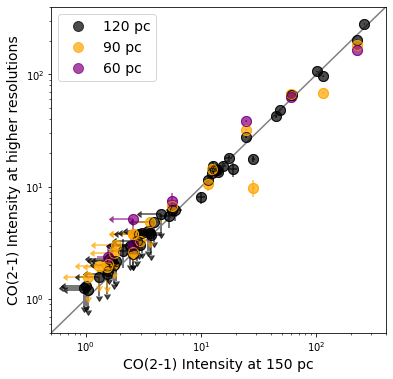

In [9]:
x60v150, y60v150, ex60v150, ey60v150 = [],[],[],[]
x90v150, y90v150, ex90v150, ey90v150 = [],[],[],[]
x120v150, y120v150, ex120v150, ey120v150 = [],[],[],[]

#get intensity v intensity arrays
for i in range(len(SNname)):
    if (np.isfinite(pc60Int[i])and np.isfinite(pc150Int[i])):
        y60v150.append(pc60Int[i])
        x60v150.append(pc150Int[i])
        ey60v150.append(pc60Err[i])
        ex60v150.append(pc150Err[i])
    if (np.isfinite(pc90Int[i])and np.isfinite(pc150Int[i])):
        y90v150.append(pc90Int[i])
        x90v150.append(pc150Int[i])
        ey90v150.append(pc90Err[i])
        ex90v150.append(pc150Err[i])
    if (np.isfinite(pc120Int[i])and np.isfinite(pc150Int[i])):
        y120v150.append(pc120Int[i])
        x120v150.append(pc150Int[i])
        ey120v150.append(pc120Err[i])
        ex120v150.append(pc150Err[i])
    
#next assign upper limit arrows and error bars
def checkULs(xvarray, yvarray, exarray, eyarray):

    detx = np.asarray(xvarray) < (3 * np.asarray(exarray))
    dety = np.asarray(yvarray) < (3 * np.asarray(eyarray))
    
    for i in range(len(detx)):
        if detx[i] == True:
            xvarray[i] = 3 * exarray[i]
        if dety[i] == True:
            yvarray[i] = 3 * eyarray[i]
    
    return(detx,dety, xvarray, yvarray)

Det60x,Det60y,x60v150Flip, y60v150Flip = checkULs(x60v150, y60v150, ex60v150, ey60v150)
Det90x,Det90y,x90v150Flip, y90v150Flip = checkULs(x90v150, y90v150, ex90v150, ey90v150)
Det120x,Det120y,x120v150Flip, y120v150Flip = checkULs(x120v150, y120v150, ex120v150, ey120v150)

x, y = np.linspace(0.5,400,1000),  np.linspace(0.5,400,1000)
fig = plt.figure(figsize=(6,6))  
plt.loglog(x,y,ls="-",color="grey")
plt.xlim(0.5,400)
plt.ylim(0.5,400)
plt.loglog(x120v150Flip,y120v150Flip,color="black", marker="o",ls="",ms=10, label="120 pc", alpha = .7)
plt.errorbar(x120v150Flip,y120v150Flip, xerr=ex120v150, yerr=ey120v150,uplims = Det120y, xuplims=Det120x,markeredgecolor="black",markerfacecolor="None", color="black", marker="o",ms=10,ls="", alpha = .7)
plt.loglog(x90v150Flip,y90v150Flip,color="orange", marker="o",ls="",ms=10, label="90 pc", alpha = .7)
plt.errorbar(x90v150Flip,y90v150Flip, xerr=ex90v150, yerr=ey90v150,uplims = Det90y, xuplims=Det90x,markeredgecolor="orange",markerfacecolor="None",  color="orange", marker="o",ms=10,ls="", alpha = .7)
plt.loglog(x60v150Flip,y60v150Flip,color="purple", marker="o",ls="",ms=10, label="60 pc", alpha = .7)
plt.errorbar(x60v150Flip,y60v150Flip, xerr=ex60v150, yerr=ey60v150,uplims = Det60y, xuplims=Det60x,markeredgecolor="purple",markerfacecolor="None",  color="purple", marker="o",ms=10,ls="", alpha = .7)
plt.legend(loc="best", fontsize = 14)
plt.ylabel("CO(2-1) Intensity at higher resolutions", fontsize=14)
plt.xlabel("CO(2-1) Intensity at 150 pc", fontsize=14)
plt.show()
fig.savefig("../Figures/ResolutionIntensityComparison.png")
plt.close()